# Phần 1: Biểu diễn ảnh màu và ảnh xám

In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Hàm dùng để hiển thị ảnh

In [57]:
def show_plt(title, img):
    plt.title(title)
    plt.axis("off")

    # Ảnh xám
    if img.ndim == 2:
        plt.imshow(img, cmap="gray", vmin=0, vmax=255)
    else:
        # Ảnh màu
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb_img)


## Load một ảnh màu đầu vào

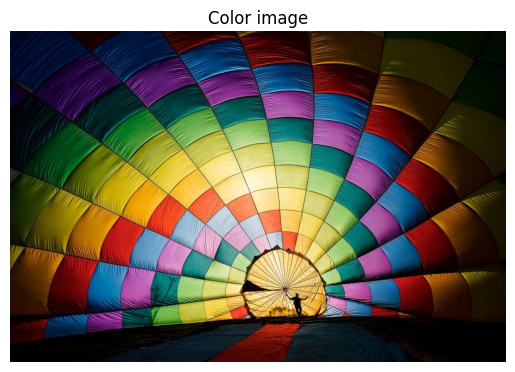

In [82]:
color_img = cv2.imread("cv_img1.jpg", cv2.IMREAD_COLOR)
show_plt("Color image", color_img)

## Chuyển ảnh màu sang ảnh xám

### Chuyển đổi bằng thư viện OpenCV 

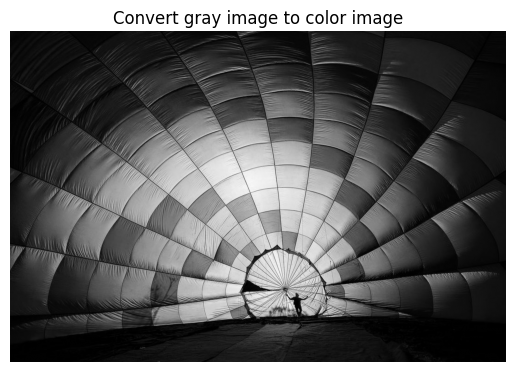

In [83]:
gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
show_plt("Convert gray image to color image", gray)

### Chuyển đổi bằng thuật toán

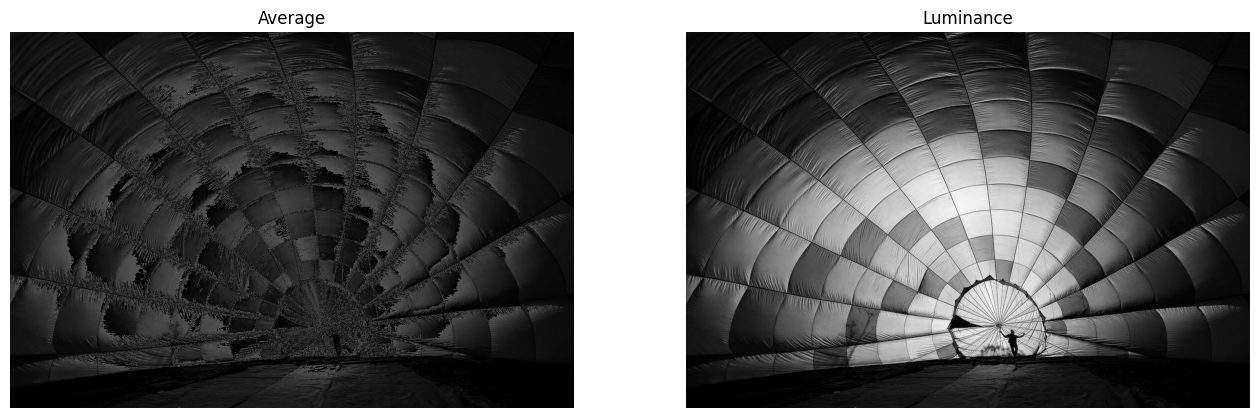

In [84]:
# Tách các kênh màu
B, G, R = cv2.split(color_img)

# Công thức 1: Gray = (R + G + B)/3
gray_1 = (R + G + B)/3

# Công thức 2: Gray = 0.299R + 0.587G + 0.114B
gray_2 = 0.299*R + 0.587*G + 0.114*B

# Hiển thị ảnh
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
show_plt("Average", gray_1)
plt.subplot(1,2,2)
show_plt("Luminance", gray_2)

## Chuyển ảnh xám sang ảnh màu

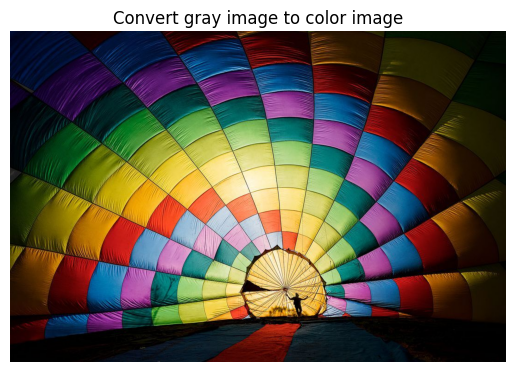

In [85]:
gray2color_img = cv2.merge([B, G, R])
show_plt("Convert gray image to color image", gray2color_img)

## Tách riêng từng kênh màu ảnh gốc và biểu diễn dưới dạng ảnh xám

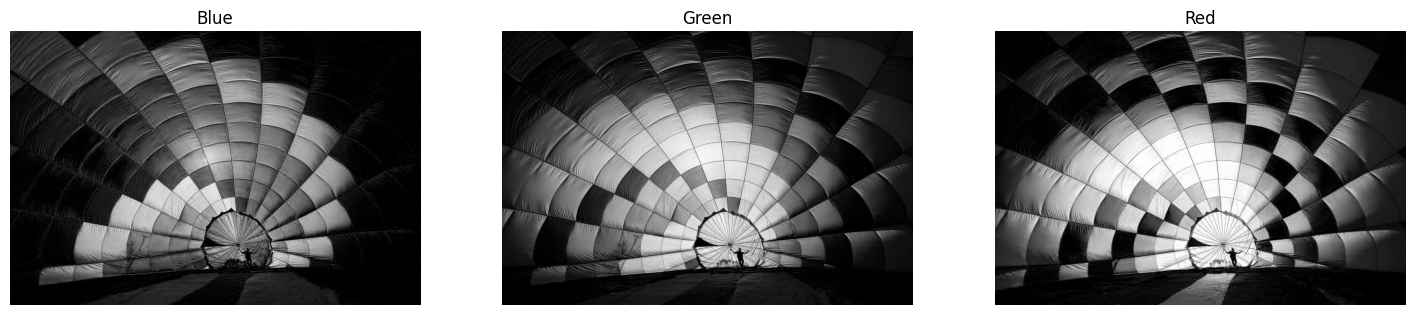

In [86]:
B, G, R = cv2.split(color_img)

plt.figure(figsize=(18,8))

plt.subplot(1,3,1)
show_plt("Blue", B)
plt.subplot(1,3,2)
show_plt("Green", G)
plt.subplot(1,3,3)
show_plt("Red", R)

## Kết hợp các kênh màu

### Tái tạo ảnh màu ban đầu

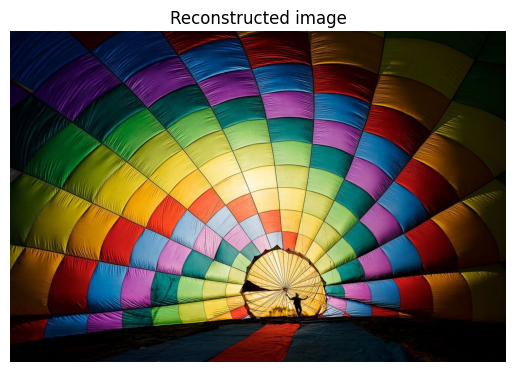

In [87]:
img_reconstructed = cv2.merge([B, G, R])
show_plt("Reconstructed image", img_reconstructed)

### Hoán đổi kênh màu để tạo ảnh màu mới

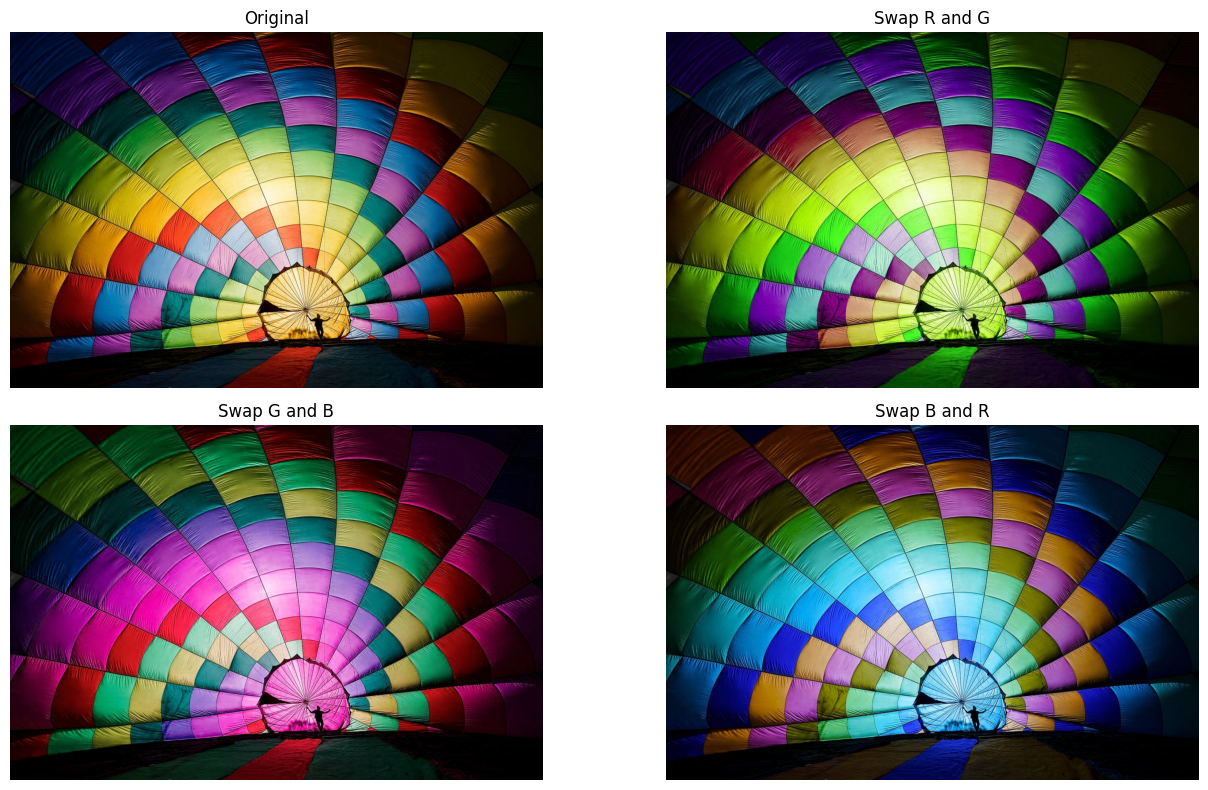

In [88]:
img_swap_rg = cv2.merge([B, R, G])
img_swap_gb = cv2.merge([G, B, R])
img_swap_br = cv2.merge([R, G, B])

plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
show_plt("Original", color_img)
plt.subplot(2,2,2)
show_plt("Swap R and G", img_swap_rg)
plt.subplot(2,2,3)
show_plt("Swap G and B", img_swap_gb)
plt.subplot(2,2,4)
show_plt("Swap B and R", img_swap_br)

plt.tight_layout()

### Thay thế kênh màu để tạo ảnh mới

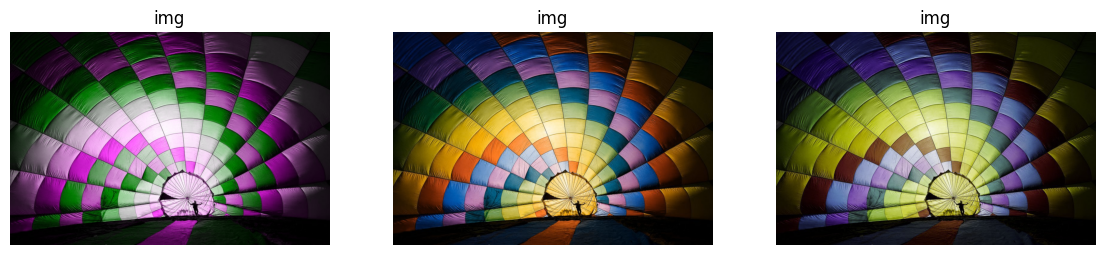

In [89]:
img_replace_br    = cv2.merge([R, G, R])
img_replace_ggray = cv2.merge([B, gray, R])
img_replace_rgray = cv2.merge([B, G, gray])

plt.figure(figsize=(14,8))
plt.subplot(1,3,1)
show_plt("img", img_replace_br)
plt.subplot(1,3,2)
show_plt("img", img_replace_ggray)
plt.subplot(1,3,3)
show_plt("img", img_replace_rgray)